## Observations and Insights
#### Add your analysis here
---

In [167]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df=mouse_metadata.merge(study_results, on = "Mouse ID")

# Display the data table for preview
combined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [168]:
# Check the number of mice.
total_number_of_mice=combined_df['Mouse ID'].nunique()
print(f"The total number of mice is {total_number_of_mice}.")

The total number of mice is 249.


In [169]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
find_dups=combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
find_dups

array(['g989'], dtype=object)

In [170]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe=combined_df[combined_df["Mouse ID"]== 'g989'] 
dupe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [171]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combined_df[combined_df["Mouse ID"].isin(find_dups) == False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [172]:
# Check the number of mice in the clean DataFrame.
cleaned_mice=clean_df['Mouse ID'].nunique()
print(f"The total number of mice is {cleaned_mice}.")


The total number of mice is 248.


## Summary Statistics

In [173]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Pull coulmns to build my summary dataframe
stats_df=clean_df.loc[:, ["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

#group and calculate variables
mean=stats_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median=stats_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance=stats_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stddev=stats_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem=stats_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Use this straighforward method, create multiple series and put them all in a dataframe at the end.

#Build output data frame. 
analysis_df=pd.DataFrame({"Mean Tumor Volume":mean,"Median Tumor Volume":median,"Tumor Volume Variance":variance, "Tumor Volume Standard Deviation": stddev, "Tumor Volume Std. Err.": sem})

#Print Output Data Frame
analysis_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [174]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Return to this if time permits.  
summary_df=analysis_df
# Use method to produce everything with a single groupby function
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

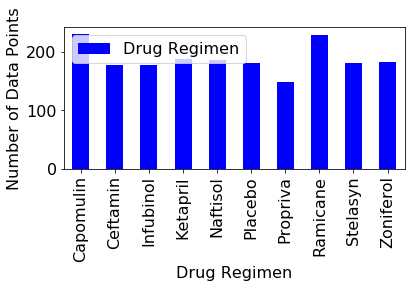

In [175]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_reg_group = clean_df.groupby('Drug Regimen')

# Create dataframe for Drug Regimen count
drug_reg_group_count = pd.DataFrame(drug_reg_group['Drug Regimen'].count())

# Create a bar chart based off of the group series from before and label the title
count_chart = drug_reg_group_count.plot(kind='bar', color="blue")

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Data Points")
plt.tight_layout()

plt.show()

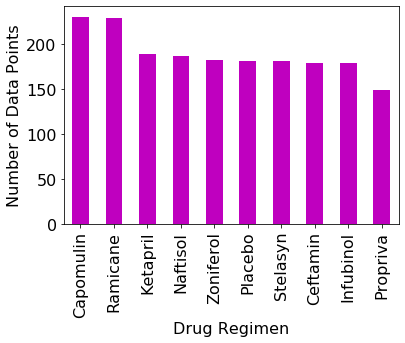

In [176]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Using clean_df from earlier
# Set x and y axis
drug_counts=clean_df["Drug Regimen"].value_counts()
y_axis=drug_counts.values
x_axis=drug_counts.index

#Need to be DataFrame.plot
drug_counts.plot(kind="bar", facecolor='m',)

#Formatting
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.show()

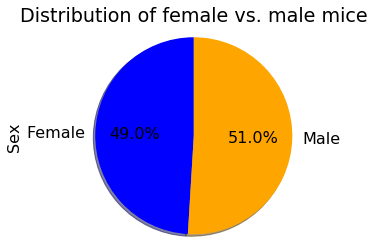

In [177]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_group = clean_df.groupby('Sex')

# Create a dataframe counting the number of data points for each gender
sex_group_count = pd.DataFrame(sex_group['Sex'].count())

# View the groupby dataframe
sex_group_count.head()
sex_group_count.plot(kind='pie', y='Sex', \
                        title="Distribution of female vs. male mice",startangle=90,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["blue","orange"],legend =False)
plt.axis("equal")
plt.show()

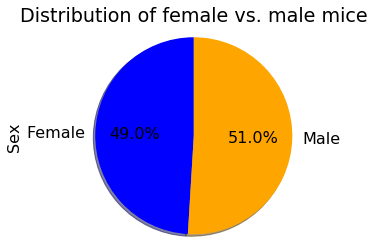

In [178]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
m_or_f = list(sex_group_count.index.values)

# The values of each section of the pie chart
m_or_f_counts = sex_group_count['Sex']

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(m_or_f_counts, labels=m_or_f, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.rcParams['font.size'] = 16
plt.title("Distribution of female vs. male mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [179]:
# Calculate the final tumor volume of each mouse across each of the treatment regimens: 
# Start by getting the last (greatest) timepoint for each mouse
max_tumor=clean_df.groupby("Mouse ID").max().reset_index()

merge_data=max_tumor[["Mouse ID","Timepoint"]].merge(clean_df, on=["Mouse ID","Timepoint"], how='left')

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#merge_data.head()

In [185]:
# Put 4 treatment names into a list for use with a for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#Note - Could not get my for-loop working.
# Create a empty list to fill with tumor vol data (for plotting) (hint: each element of the list will be series)
tumor_vol_list = []

four_drugs = clean_df[clean_df['Drug Regimen'].isin(treatment_list)]
# View the groupby dataframe
capomulin= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane= clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol=clean_df.loc[clean_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin= clean_df.loc[clean_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

#Capomulin
quartile_cap= capomulin.quantile([.25,.5,.75])
lower_cap= quartile_cap[.25]
upper_cap=quartile_cap[.75]
iqr= upper_cap-lower_cap

#Infubionol
lower_ocap= lower_cap-(1.5*iqr)
upper_ocap= upper_cap+(1.5*iqr)
#print('Capomulin Tumor Volume (mm3)'+clean_df['Tumor Volume (mm3)'])
print('---Capomulin-----------------------------------------')
print(f"Number below {round(lower_ocap, 2)} is an outlier")
print(f"Number above {round(upper_ocap, 2)} is an outlier")

#Ramicane
quartile_ram= ramicane.quantile([.25,.5,.75])
lower_ram= quartile_ram[.25]
upper_ram=quartile_ram[.75]
iqr= upper_ram-lower_ram
#Ramicane Outliers
lower_oram= lower_ram-(1.5*iqr)
upper_oram= upper_ram+(1.5*iqr)
print('---Ramicane-------------------------------------------')
print(f"Number below {round(lower_oram, 2)} is an outlier")
print(f"Number above {round(upper_oram, 2)} is an outlier")

#Infubinol
quartile_in=infubinol.quantile([.25,.5,.75])
lower_in= quartile_in[.25]
upper_in=quartile_in[.75]
iqr= upper_in-lower_in
#Infubionol Outliers
lower_oin= lower_in-(1.5*iqr)
upper_oin= upper_in+(1.5*iqr)

print('---Infubinol------------------------------------------')
print(f"Number below {round(lower_oin, 2)} is an outlier")
print(f"Number above {round(upper_oin, 2)} is an outlier")

quartile_ce=ceftamin.quantile([.25,.5,.75])
lower_ce= quartile_ce[.25]
upper_ce=quartile_ce[.75]
iqr= upper_ce-lower_ce
#Ceftmain Outliers
lower_oce= lower_ce-(1.5*iqr)
upper_oce= upper_ce+(1.5*iqr)

print('---Ceftamin-------------------------------------------')
print(f"Number below {round(lower_oce, 2)} is an outlier")
print(f"Number above {round(upper_oce, 2)} is an outlier")

    

---Capomulin-----------------------------------------
Number below 26.71 is an outlier
Number above 55.97 is an outlier
---Ramicane-------------------------------------------
Number below 24.19 is an outlier
Number above 57.49 is an outlier
---Infubinol------------------------------------------
Number below 32.31 is an outlier
Number above 72.32 is an outlier
---Ceftamin-------------------------------------------
Number below 32.82 is an outlier
Number above 71.19 is an outlier


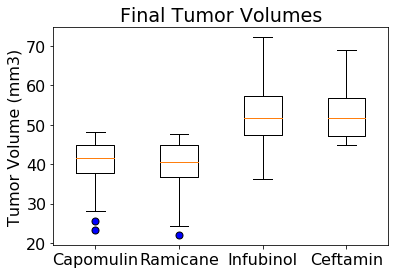

In [181]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_vol = dict(markerfacecolor='blue',markersize=7)

#Make Box Plot
plt.boxplot([capomulin,ramicane, infubinol, ceftamin], labels=["Capomulin","Ramicane","Infubinol","Ceftamin"], flierprops= tumor_vol)

#Formatting
plt.title("Final Tumor Volumes")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

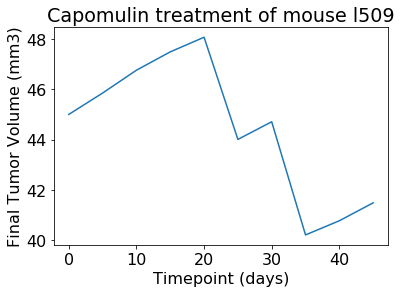

In [182]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_plot= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
mouse= clean_df.loc[clean_df['Mouse ID'] == 'l509']

plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

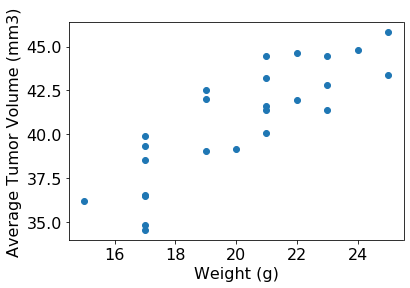

In [183]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_scatter= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

cap_mean=capomulin_scatter.groupby(["Mouse ID"]).mean()

plt.scatter(cap_mean["Weight (g)"],cap_mean["Tumor Volume (mm3)"] )
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor is 0.8419363424694718


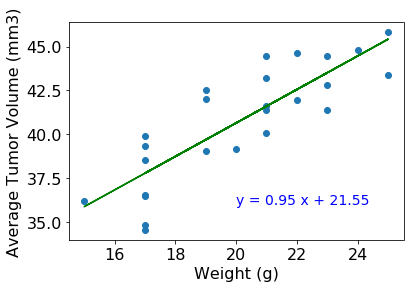

In [184]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(cap_mean["Weight (g)"],cap_mean["Tumor Volume (mm3)"])
regress_values=cap_mean["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
print(f'The correlation between mouse weight and the average tumor is {rvalue}')
plt.scatter(cap_mean["Weight (g)"],cap_mean["Tumor Volume (mm3)"] )
plt.plot(cap_mean["Weight (g)"], regress_values, color='green')
plt.annotate(line_eq,(20,36), color='blue', fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()